In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tomophantom
from tomophantom import TomoP3D
from tomophantom.supp.qualitymetrics import QualityTools
from tomophantom.supp.flatsgen import synth_flats
import mrcfile

saveFolder = '/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms'

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

# Explore phantoms

Building 3D phantom using TomoPhantom software
1


<Figure size 960x640 with 0 Axes>

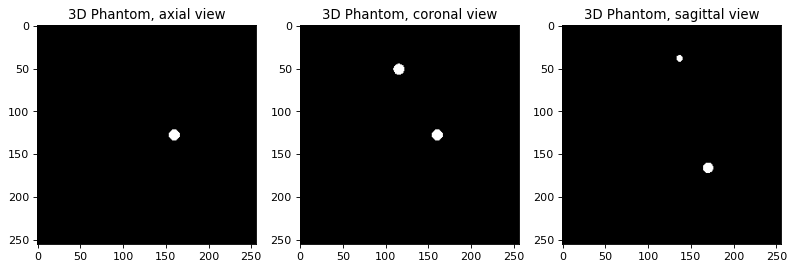

2


<Figure size 960x640 with 0 Axes>

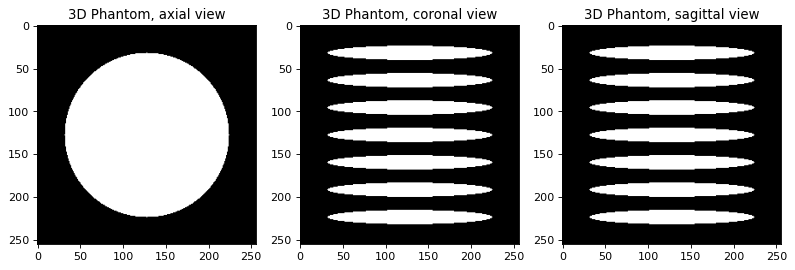

3


<Figure size 960x640 with 0 Axes>

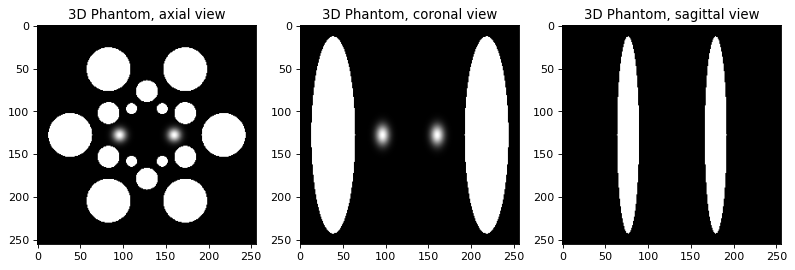

4


<Figure size 960x640 with 0 Axes>

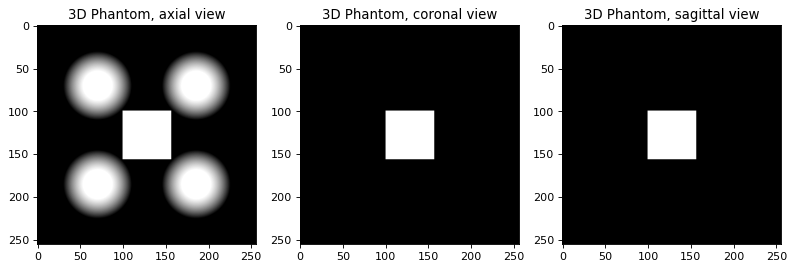

5


<Figure size 960x640 with 0 Axes>

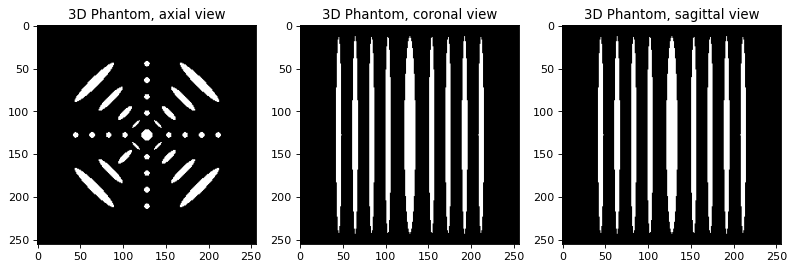

6


<Figure size 960x640 with 0 Axes>

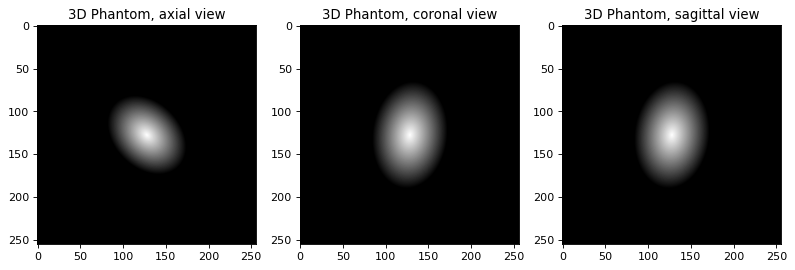

7


<Figure size 960x640 with 0 Axes>

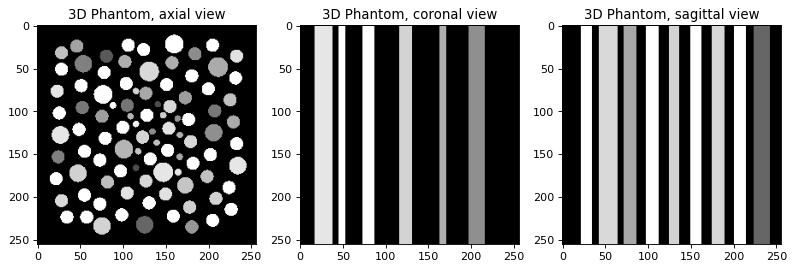

8


<Figure size 960x640 with 0 Axes>

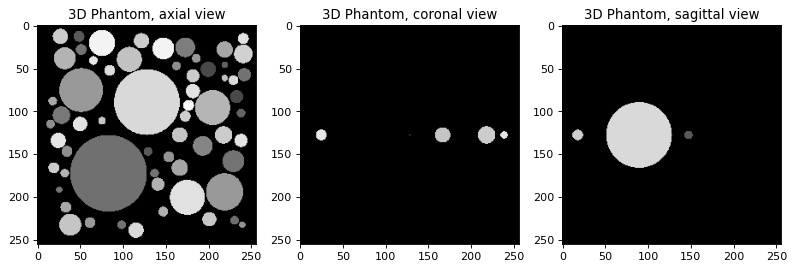

9


<Figure size 960x640 with 0 Axes>

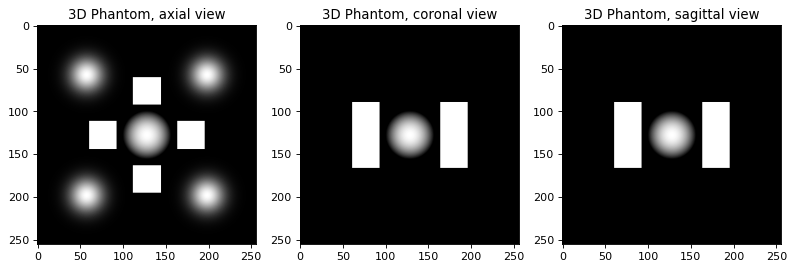

10


<Figure size 960x640 with 0 Axes>

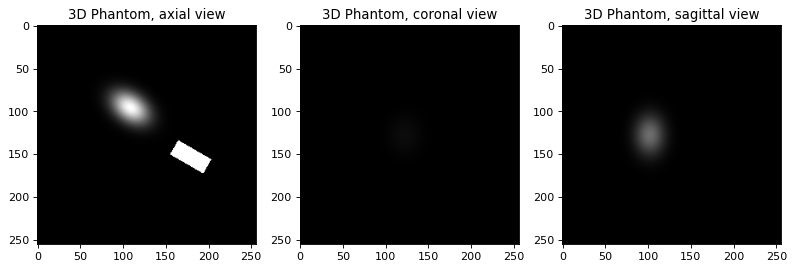

11


<Figure size 960x640 with 0 Axes>

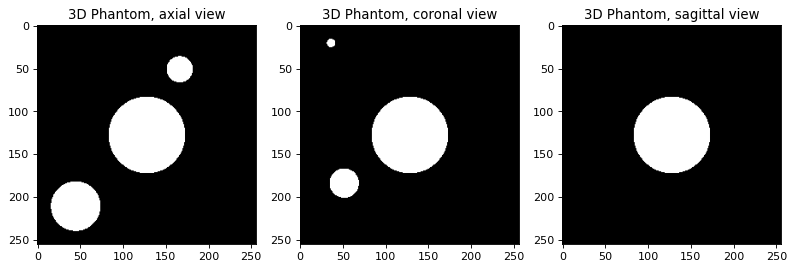

12


<Figure size 960x640 with 0 Axes>

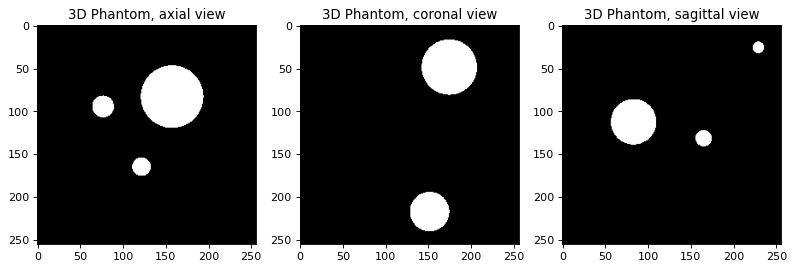

13


<Figure size 960x640 with 0 Axes>

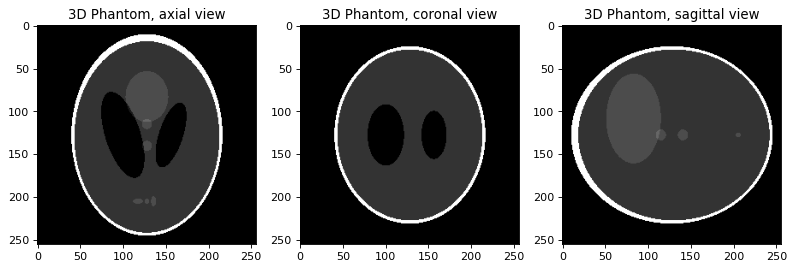

14


<Figure size 960x640 with 0 Axes>

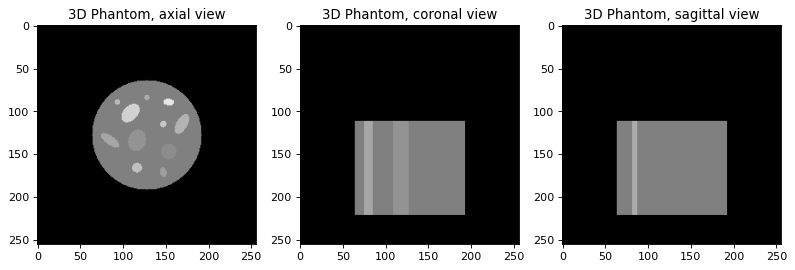

15


<Figure size 960x640 with 0 Axes>

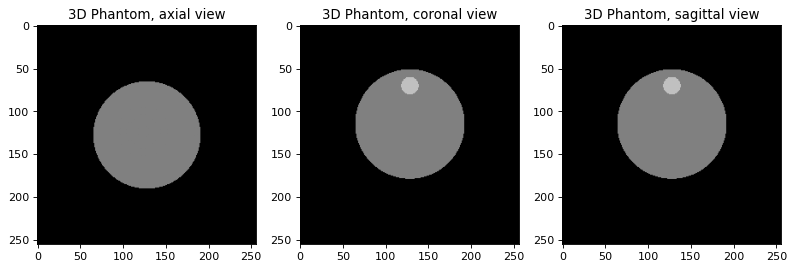

16


<Figure size 960x640 with 0 Axes>

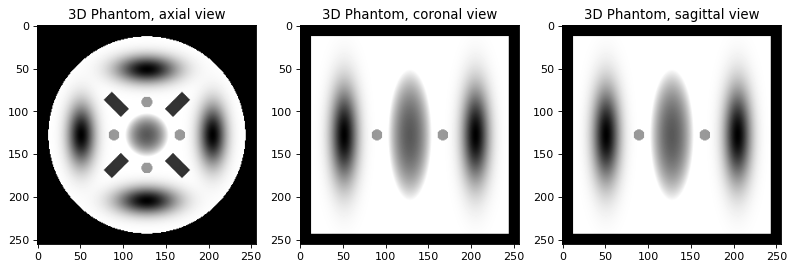

17


<Figure size 960x640 with 0 Axes>

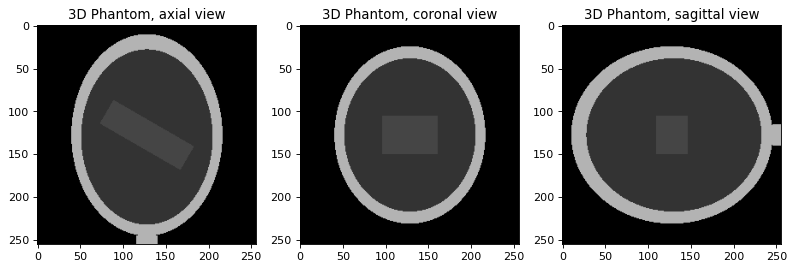

18


<Figure size 960x640 with 0 Axes>

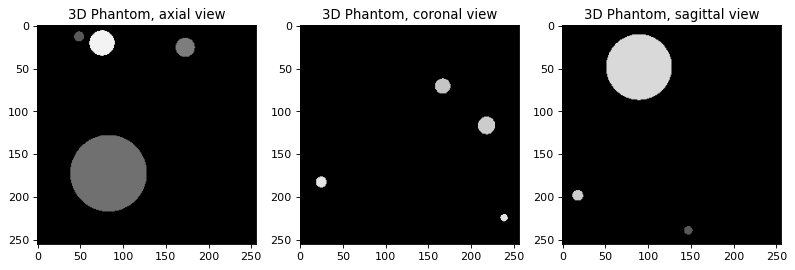

In [4]:
print ("Building 3D phantom using TomoPhantom software")
N_size = 256 # Define phantom dimensions using a scalar value (cubic phantom)
path = os.path.dirname(tomophantom.__file__)
path_library3D = os.path.join(path, "Phantom3DLibrary.dat")

for model in range(1, 19):
    print(model)
    #This will generate a N_size x N_size x N_size phantom (3D)
    phantom_tm = TomoP3D.Model(model, N_size, path_library3D)

    sliceSel = int(0.5*N_size)
    plt.gray()
    plt.figure() 
    plt.subplot(131)
    plt.imshow(phantom_tm[sliceSel,:,:],vmin=0, vmax=1)
    plt.title('3D Phantom, axial view')

    plt.subplot(132)
    plt.imshow(phantom_tm[:,sliceSel,:],vmin=0, vmax=1)
    plt.title('3D Phantom, coronal view')

    plt.subplot(133)
    plt.imshow(phantom_tm[:,:,sliceSel],vmin=0, vmax=1)
    plt.title('3D Phantom, sagittal view')
    plt.show()

# Clean phantom

In [11]:
def filter_phantom(phantom_tm):
    nonzero_zidx = []
    for zidx in range(len(phantom_tm)):
        if phantom_tm[zidx, :, :].sum()!=0:
            nonzero_zidx.append(zidx)
    return phantom_tm[nonzero_zidx]

Building 3D phantom using TomoPhantom software
Tomo shape: (89, 256, 256)


<Figure size 960x640 with 0 Axes>

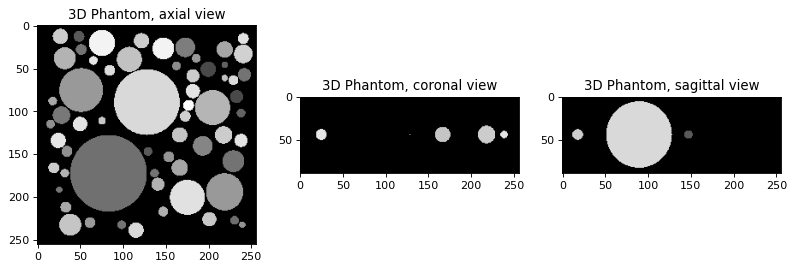

Tomo shape: (110, 256, 256)


<Figure size 960x640 with 0 Axes>

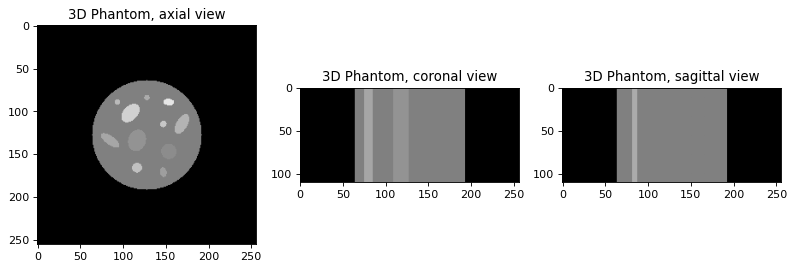

Tomo shape: (256, 256, 256)


<Figure size 960x640 with 0 Axes>

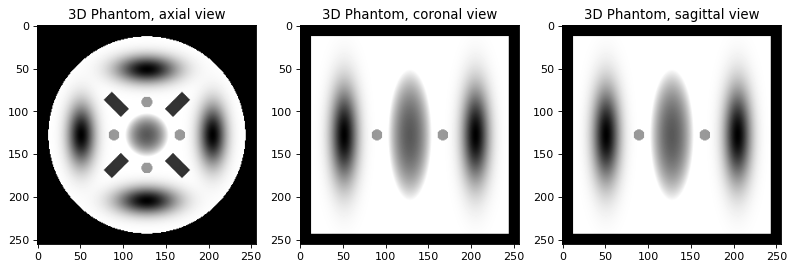

In [18]:
print ("Building 3D phantom using TomoPhantom software")
N_size = 256 # Define phantom dimensions using a scalar value (cubic phantom)
path = os.path.dirname(tomophantom.__file__)
path_library3D = os.path.join(path, "Phantom3DLibrary.dat")

# select a model number from the library: 8, 14, 16
for model in [8, 14, 16]:
    #This will generate a N_size x N_size x N_size phantom (3D)
    phantom_tm = TomoP3D.Model(model, N_size, path_library3D)
    phantom_tm = filter_phantom(phantom_tm)
    
    print("Tomo shape:", phantom_tm.shape)

    sliceSel = np.array(phantom_tm.shape)//2
    plt.gray()
    plt.figure() 
    plt.subplot(131)
    plt.imshow(phantom_tm[sliceSel[0],:,:],vmin=0, vmax=1)
    plt.title('3D Phantom, axial view')

    plt.subplot(132)
    plt.imshow(phantom_tm[:,sliceSel[1],:],vmin=0, vmax=1)
    plt.title('3D Phantom, coronal view')

    plt.subplot(133)
    plt.imshow(phantom_tm[:,:,sliceSel[2]],vmin=0, vmax=1)
    plt.title('3D Phantom, sagittal view')
    plt.show()


    filename = 'tomoPhantom_model%i.mrc' %model
    with mrcfile.new(os.path.join(saveFolder, filename), overwrite=True) as mrc:
        mrc.set_data(phantom_tm)

(array([7161213.,   35820.,  183384.,   75897.,  119444.,  170886.,
         247834.,  383118.,  738546., 7661074.]),
 array([-0.0095874 ,  0.09137134,  0.19233008,  0.29328883,  0.39424756,
         0.4952063 ,  0.59616506,  0.69712377,  0.79808253,  0.89904124,
         1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

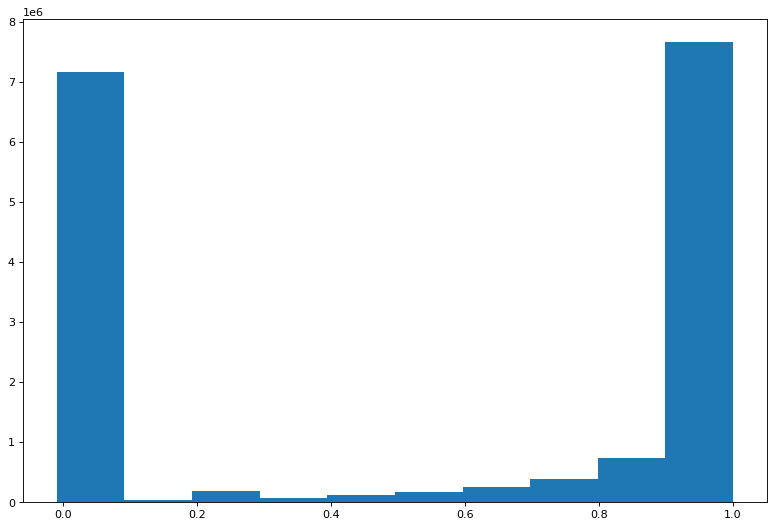

In [6]:
plt.hist(phantom_tm.flatten())

# MW Phantom

Building 3D analytical projection data with TomoPhantom


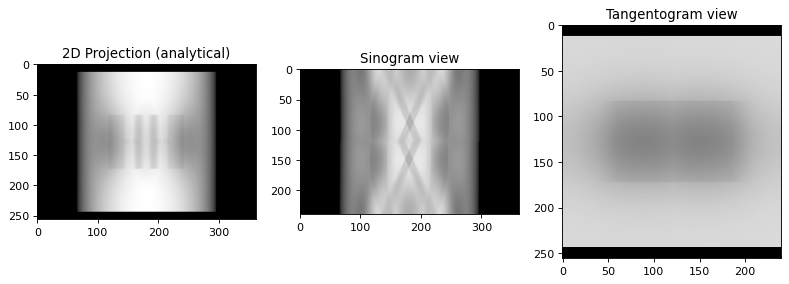

In [9]:
# 3D parallel beam projection geometry related parameters:
Horiz_det = int(np.sqrt(2)*N_size) # detector column count (horizontal)
Vert_det = N_size # detector row count (vertical) (no reason for it to be > N)
#### original params #
# angles_num = int(0.5*np.pi*N_size); # angles number original
# angles = np.linspace(0.0,179.9,angles_num,dtype='float32') # in degrees
#### missing wedge angles
# angles_num = int(0.5*np.pi*N_size) # angles number original
# angles = list(np.linspace(0,60,angles_num//2,dtype='float32')) # in degrees
# _angles = list(np.linspace(120,180,angles_num//2,dtype='float32')) # in degrees

angles = list(np.arange(0, 60, 0.5, dtype='float32')) # in degrees
_angles = list(np.arange(120, 180, 0.5, dtype='float32')) # in degrees

angles = np.array(angles+_angles)

angles_rad = angles*(np.pi/180.0)
#%%
print ("Building 3D analytical projection data with TomoPhantom")
projData3D_analyt= TomoP3D.ModelSino(model, N_size, Horiz_det, Vert_det, angles, path_library3D)

intens_max_clean = np.max(projData3D_analyt)
sliceSel = len(angles)//2
plt.figure() 
plt.subplot(131)
plt.imshow(projData3D_analyt[:,sliceSel,:],vmin=0, vmax=intens_max_clean)
plt.title('2D Projection (analytical)')
plt.subplot(132)
plt.imshow(projData3D_analyt[sliceSel,:,:],vmin=0, vmax=intens_max_clean)
plt.title('Sinogram view')
plt.subplot(133)
plt.imshow(projData3D_analyt[:,:,sliceSel],vmin=0, vmax=intens_max_clean)
plt.title('Tangentogram view')
plt.show()

Reconstruction using FBP from tomobar


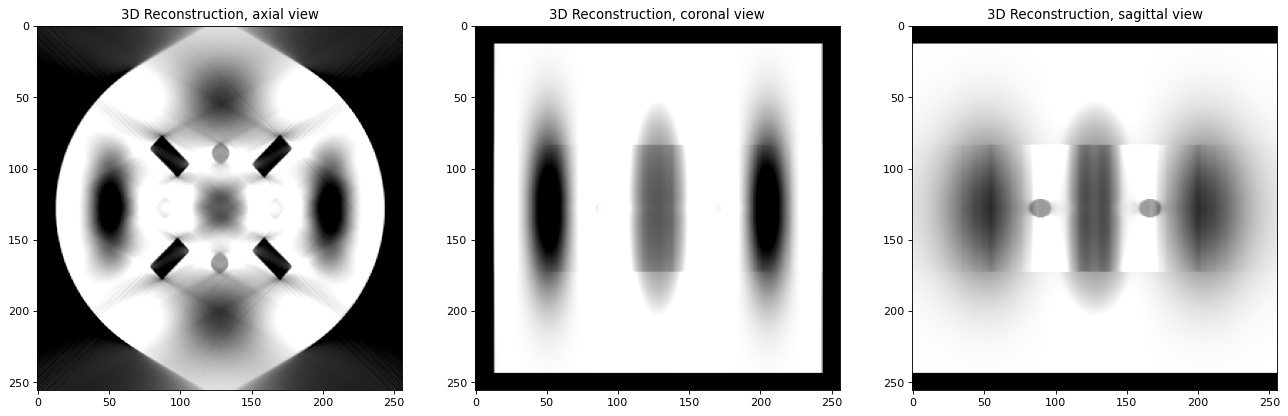

In [10]:
print ("Reconstruction using FBP from tomobar")
# initialise tomobar DIRECT reconstruction class ONCE
from tomobar.methodsDIR import RecToolsDIR
RectoolsDIR = RecToolsDIR(DetectorsDimH = Horiz_det,  # DetectorsDimH # detector dimension (horizontal)
                    DetectorsDimV = Vert_det,  # DetectorsDimV # detector dimension (vertical) for 3D case only
                    CenterRotOffset = None, # The Center of Rotation (CoR) scalar
                    AnglesVec = angles_rad, # array of angles in radians
                    ObjSize = N_size, # a scalar to define reconstructed object dimensions
                    device_projector = 'gpu')

mw_reconstruction= RectoolsDIR.FBP(projData3D_analyt) # FBP reconstruction

sliceSel = int(0.5*N_size)
max_val = 1
#plt.gray()
plt.figure(figsize=(20, 14)) 
plt.subplot(131)
plt.imshow(mw_reconstruction[sliceSel,:,:],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, axial view')

plt.subplot(132)
plt.imshow(mw_reconstruction[:,sliceSel,:],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, coronal view')

plt.subplot(133)
plt.imshow(mw_reconstruction[:,:,sliceSel],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, sagittal view')
plt.show()


filename = 'tomoPhantom_model%i_MW.mrc' %model
with mrcfile.new(os.path.join(saveFolder, filename), overwrite=True) as mrc:
    mrc.set_data(mw_reconstruction)